In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tensorflow 2.0.0 Basics Review
## tf variables
## tf operations
## tf keras modeling
## tf data pipelines
## tf layers and activation functions
## tf gradients and loss functions
## tf custom model training I
## tf custom model training II 

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn')

In [3]:
'''
- check tensorflow and keras version
'''
print(f'Tensorflow GPU Version: {tf.__version__}')
print(f'Eager Execution is: {tf.executing_eagerly()}')
print(f'Keras Version: {tf.keras.__version__}')

Tensorflow GPU Version: 2.0.0
Eager Execution is: True
Keras Version: 2.2.4-tf


In [4]:
'''
- check GPU 
'''
var = tf.Variable([3,3])
if tf.test.is_gpu_available():
    print('Running on GPU')
else:
    print('Runing on CPU')

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Running on GPU


Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

# tf variables

In [62]:
'''
- Declare variables
'''
var = 56
tf1 = tf.Variable(var, dtype=tf.float32)
tf1.assign(5.6)
tf2 = tf.Variable([[0,4,5],[4,2,7],[7,8,9]])
print('tf1: ',tf1)
print('tf2: ',tf2)
print(f'tf1 iwth Numpy: {tf1.numpy()}')

tf1:  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.6>
tf2:  <tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[0, 4, 5],
       [4, 2, 7],
       [7, 8, 9]], dtype=int32)>
tf1 iwth Numpy: 5.599999904632568


In [72]:
'''
- Declare Constants
'''
constantVar = tf.constant(568, dtype = tf.int16)
print(constantVar)
print(constantVar.numpy())

tf.Tensor(568, shape=(), dtype=int16)
568


In [86]:
'''
- Reshape a tensor
'''
var = tf.Variable([[2,3,4,5],[5,2,9,0],[3,1,2,4]], dtype=tf.float32)
print('var shape:',var.shape)
var1 = tf.reshape(var,(2,6))
print('var1 shape:',var1.shape)
var2 = tf.reshape(var, (1,12))
print('var2 shape:',var2.shape)
var3 = tf.reshape(var, (4,3))
print('var3 shape:',var3.shape)

var shape: (3, 4)
var1 shape: (2, 6)
var2 shape: (1, 12)
var3 shape: (4, 3)


In [43]:
'''
- tensor dimention
- tensor slice
- tensor cast numpy
- tensor slice
- tensor dtype
'''
var = tf.Variable([[[2,3,4,5],[5,2,9,0],[3,1,2,4]],[[0,30,40,50],[5,2,9,0],[3,1,2,4]],[[12,13,14,15],[5,2,9,0],[3,1,2,4]]], dtype=tf.float32)
print('var rank:',tf.rank(var))
var2 = var[0:2]
print('var2 slice:',var2)
print('var2 rank:',tf.rank(var2).numpy())
print('var2 size:',tf.size(var2).numpy())
print('var2 dtype:', var2.dtype)

var rank: tf.Tensor(3, shape=(), dtype=int32)
var2 slice: tf.Tensor(
[[[ 2.  3.  4.  5.]
  [ 5.  2.  9.  0.]
  [ 3.  1.  2.  4.]]

 [[ 0. 30. 40. 50.]
  [ 5.  2.  9.  0.]
  [ 3.  1.  2.  4.]]], shape=(2, 3, 4), dtype=float32)
var2 rank: 3
var2 size: 24
var2 dtype: <dtype: 'float32'>


In [53]:
'''
- tensor element-wise primitive tensor operations
- tensor broadcasting
'''
var1 = tf.Variable([[[2,3,4,5],[5,2,9,0],[3,1,2,4]],[[0,30,40,50],[5,2,9,0],[3,1,2,4]],[[12,13,14,15],[5,2,9,0],[3,1,2,4]]], dtype=tf.float32)
var2 = tf.Variable([[[2,2,2,2],[2,2,2,2],[2,2,2,2]],[[2,2,2,2],[2,2,2,2],[2,2,2,2]],[[2,2,2,2],[2,2,2,2],[2,2,2,2]]], dtype=tf.float32)
var = var1 * var2
print('var tensor:\n',var)
print('\nvar numpy cast:\n',var.numpy())
print('\nvar*4:\n',var*4)

var tensor:
 tf.Tensor(
[[[  4.   6.   8.  10.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[  0.  60.  80. 100.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[ 24.  26.  28.  30.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]], shape=(3, 3, 4), dtype=float32)

var numpy cast:
 [[[  4.   6.   8.  10.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[  0.  60.  80. 100.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]

 [[ 24.  26.  28.  30.]
  [ 10.   4.  18.   0.]
  [  6.   2.   4.   8.]]]

var*4:
 tf.Tensor(
[[[ 16.  24.  32.  40.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]

 [[  0. 240. 320. 400.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]

 [[ 96. 104. 112. 120.]
  [ 40.  16.  72.   0.]
  [ 24.   8.  16.  32.]]], shape=(3, 3, 4), dtype=float32)


In [68]:
'''
- tensor multiplication
- tensor constant
- tensor constant cast
'''
var1 = tf.constant([[1,2,3],[4,5,3]])
var2 = tf.constant([[1,2,3],[4,5,3]])
var = tf.matmul(var1,tf.transpose(var2))
print('var:\n',var)
var = tf.cast(var, dtype=tf.float32)
print('\nvar dtype:', var.dtype)

var:
 tf.Tensor(
[[14 23]
 [23 50]], shape=(2, 2), dtype=int32)

var dtype: <dtype: 'float32'>


In [88]:
'''
- ragged tensors by constant
- ragged tensors by split_row
'''
ragged_tensor = tf.ragged.constant([[1,2,4],[],[3,4],[1]], dtype=tf.float32, name='ragged_tensor')
print(ragged_tensor)
print(ragged_tensor[0])
print(ragged_tensor[3])
ragged_tensor2 = tf.RaggedTensor.from_row_splits(values=[1,2,4,5,6,7,8], row_splits=[0,3,3,5,6,7])
print(ragged_tensor2)

<tf.RaggedTensor [[1.0, 2.0, 4.0], [], [3.0, 4.0], [1.0]]>
tf.Tensor([1. 2. 4.], shape=(3,), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
<tf.RaggedTensor [[1, 2, 4], [], [5, 6], [7], [8]]>


# tf operations

In [106]:
'''
- calculate square differences
'''
t1 = tf.random.normal((3,1))
t2 = tf.random.normal((3,1))
t = tf.math.squared_difference(t1,t2,name='square_difference')
print('_t1:\n',t1)
print('_t2:\n',t2)
print('_t:\n',t)

_t1:
 tf.Tensor(
[[0.23302452]
 [0.33036613]
 [0.07002912]], shape=(3, 1), dtype=float32)
_t2:
 tf.Tensor(
[[-1.1006709 ]
 [-0.40500164]
 [-1.2100329 ]], shape=(3, 1), dtype=float32)
_t:
 tf.Tensor(
[[1.7787435 ]
 [0.54076576]
 [1.638559  ]], shape=(3, 1), dtype=float32)


In [180]:
'''
- calculate tensor mean
'''
var = tf.constant(tf.random.uniform((3,3),minval=0, maxval= 10, dtype=tf.float32))
cross_mean = tf.reduce_mean(var, axis=None)
x_mean = tf.reduce_mean(var, axis=0)
y_mean = tf.reduce_mean(var, axis=1)
x_mean_dim = tf.reduce_mean(var, axis=0,keepdims=True)
y_mean_dim = tf.reduce_mean(var, axis=1, keepdims=True)
print('_var:\n',var)
print('\n_cross_mean:\n',cross_mean)
print('\n_x_mean:\n',x_mean)
print('\n_x_mean_same_dim:\n',x_mean_dim)
print('\n_y_mean:\n',y_mean)
print('\n_y_mean_same_dim:\n',y_mean_dim)

_var:
 tf.Tensor(
[[8.844145   8.424911   5.7227373 ]
 [4.715581   8.562659   7.411667  ]
 [0.57933927 8.567917   4.0922523 ]], shape=(3, 3), dtype=float32)

_cross_mean:
 tf.Tensor(6.324579, shape=(), dtype=float32)

_x_mean:
 tf.Tensor([4.7130218 8.518496  5.7422185], shape=(3,), dtype=float32)

_x_mean_same_dim:
 tf.Tensor([[4.7130218 8.518496  5.7422185]], shape=(1, 3), dtype=float32)

_y_mean:
 tf.Tensor([7.6639304 6.8966355 4.4131694], shape=(3,), dtype=float32)

_y_mean_same_dim:
 tf.Tensor(
[[7.6639304]
 [6.8966355]
 [4.4131694]], shape=(3, 1), dtype=float32)


In [168]:
'''
- tensors with random normal values
'''
tf.random.set_seed(2)
var_random1 = tf.random.normal((4,1),mean=0,stddev=1)
var_random2 = tf.random.normal((4,1),mean=5,stddev=10)
print('_random_var1:\n',var_random1)
print('_random_var2:\n',var_random2)

_random_var1:
 tf.Tensor(
[[ 0.43616885]
 [-1.9093795 ]
 [ 1.3789066 ]
 [-1.0405852 ]], shape=(4, 1), dtype=float32)
_random_var2:
 tf.Tensor(
[[ 4.6377807]
 [14.660629 ]
 [-6.065405 ]
 [ 7.9940577]], shape=(4, 1), dtype=float32)


In [187]:
'''
- tensors with random uniform values
'''
tf.random.set_seed(2)
var1 = tf.random.uniform((4,1),minval=1, maxval=4, dtype=tf.int32)
var2 = tf.random.uniform((4,1),minval=5, maxval=8, dtype=tf.int32)
var_concat_x = tf.concat(values=[var1,var2],axis=0)
var_concat_y = tf.concat(values=[var1,var2],axis=1)
print('_var1:',var1)
print('_var2:',var2)
print('_var_concat_x:',var_concat_x)
print('_var_concat_y:',var_concat_y)

_var1: tf.Tensor(
[[3]
 [1]
 [3]
 [1]], shape=(4, 1), dtype=int32)
_var2: tf.Tensor(
[[7]
 [5]
 [7]
 [7]], shape=(4, 1), dtype=int32)
_var_concat_x: tf.Tensor(
[[3]
 [1]
 [3]
 [1]
 [7]
 [5]
 [7]
 [7]], shape=(8, 1), dtype=int32)
_var_concat_y: tf.Tensor(
[[3 7]
 [1 5]
 [3 7]
 [1 7]], shape=(4, 2), dtype=int32)


In [233]:
'''
- indexing tensor values
- defualt axis=None, it's across cols to search max or min
'''
tf.random.set_seed(1)
var = tf.constant(tf.random.uniform((10,10), minval=-2, maxval=10, dtype=tf.int32))
_max_index_x = tf.argmax(input = var, axis=0, output_type=tf.int32)
_min_index_y = tf.argmin(input = var, axis=1, output_type=tf.int32)
print('_var:\n', var)
print('_max_index_x:\n',_max_index_x.numpy())
print('_min_index_y:\n',_min_index_y.numpy())

_var:
 tf.Tensor(
[[ 4  7  1  3  4  8  8  5  2  0]
 [ 6  4  0  9  4  3 -2  2  5 -1]
 [ 3  4  8  0 -1  5  0  8  4  7]
 [ 8  2  9  7  0  5  7  8  1  2]
 [ 3  1 -1  9 -2  5  2  7 -2  0]
 [ 3  8 -1 -2  8  1  5  7  5  6]
 [ 0  9 -2  3  8  3  4  0  4  0]
 [ 0  9  2  3  8  1  1  3  1  4]
 [-2  5  4  6 -2 -1  0  2  0  7]
 [-2  1  8  6 -2  4  3  6  4  0]], shape=(10, 10), dtype=int32)
_max_index_x:
 [3 6 3 1 5 0 0 2 1 2]
_min_index_y:
 [9 6 4 4 4 3 2 0 0 0]


In [92]:
'''
- Checkpoint to restore and save tensors
- Checkpoint's constructor accepts keyword arguments whose values are types that contain trackable state, such as 
  ~`tf.keras.optimizers.Optimizer` implementations, 
  ~`tf.Variable`, 
  ~`tf.keras.Layer` implementations,
  ~`tf.keras.Model` implementations. 
  It saves these values with a checkpoint and maintains a `save_counter` for numbering checkpoints
'''
var = tf.Variable([[4,5,6],[4,5,6],[4,5,6]])
print('original var: \n',var.numpy())
savePoint = tf.train.Checkpoint(var=var)
savePath = savePoint.save('./tk_ckpts/vars')
var.assign([[0,0,6],[4,0,0],[0,5,0]])
print('new var: \n',var.numpy())
savePoint.restore(savePath)
print('restore var: \n',var.numpy())

original var: 
 [[4 5 6]
 [4 5 6]
 [4 5 6]]
new var: 
 [[0 0 6]
 [4 0 0]
 [0 5 0]]
restore var: 
 [[4 5 6]
 [4 5 6]
 [4 5 6]]


In [343]:
'''
- tf.function(
    func=None, input_signature=None, autograph=True, experimental_implements=None,
    experimental_autograph_options=None, experimental_relax_shapes=False,
    experimental_compile=None
)

'''
def calc(x,y):
    return x**2*5+y
f1 = tf.function(test)
print(f1(2,3))

@tf.function
def calc_2(x,y):
    return x*6+y
print(calc_2(3,4))

tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)


In [158]:
'''
- tf.stack
- axis=0, take each item in the list and stack from top to bottom
- axis=1, take values of each item in the list and make a row and stack rows from top to bottom 
'''
var1 = tf.constant([1,2,3,4])
var2 = tf.constant([1,2,3,4])
var3 = tf.constant([1,2,3,4])
stack_x = tf.stack([var1,var2,var3], axis=0)
stack_y = tf.stack([var1,var2,var3], axis=1)
print('stack_x: \n', stack_x)
print('\nstack_y: \n',stack_y)

stack_x: 
 tf.Tensor(
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]], shape=(3, 4), dtype=int32)

stack_y: 
 tf.Tensor(
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]], shape=(4, 3), dtype=int32)


# tf keras modeling

In [344]:
from tensorflow.keras import backend as K

In [353]:
'''
- declare a variable with backend
- Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle low-level operations such as tensor products, convolutions and so on itself. 
- Instead, it relies on a specialized, well optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. Rather than picking one single tensor library and making the 
implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras.
'''
var = K.constant([[1,2],[3,4]],dtype=tf.float16)
var

<tf.Tensor: id=4445, shape=(2, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float16)>

In [40]:
'''
- load minist data
'''
mnist = tf.keras.datasets.mnist
(train_x, train_y),(test_x, test_y)=mnist.load_data()
train_x = train_x.astype('float32')/255
test_x =test_x.astype('float32')/255
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)

In [52]:
'''
- tf.keras Functional API
'''
ipt = tf.keras.Input(shape=(28,28,1))
opt = tf.keras.layers.Conv2D(32,3)(ipt)
opt = tf.keras.layers.LeakyReLU()(opt)
opt = tf.keras.layers.BatchNormalization()(opt)
opt = tf.keras.layers.MaxPool2D((3,3))(opt)

opt = tf.keras.layers.Conv2D(64,3)(opt)
opt = tf.keras.layers.LeakyReLU()(opt)
opt = tf.keras.layers.BatchNormalization()(opt)
opt = tf.keras.layers.MaxPool2D((3,3))(opt)

opt = tf.keras.layers.Flatten()(opt)
opt = tf.keras.layers.Dense(256, activation='relu')(opt)
opt = tf.keras.layers.Dense(10, activation='softmax')(opt)

model = tf.keras.models.Model(ipt, opt)
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['acc']
)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 6, 6, 64)          0   

In [24]:
model.fit(
    train_x, 
    train_y,
    batch_size = 128,
    epochs = 10,
    validation_data=(test_x,test_y),
)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1646 - acc: 0.9532 - val_loss: 0.2478 - val_acc: 0.9220
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0489 - acc: 0.9844 - val_loss: 0.0399 - val_acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0335 - acc: 0.9891 - val_loss: 0.0390 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0295 - acc: 0.9905 - val_loss: 0.0350 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0227 - acc: 0.9929 - val_loss: 0.0549 - val_acc: 0.9819
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0202 - acc: 0.9931 - val_loss: 0.0441 - val_acc: 0.9860
Epoch 7/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0162 - acc: 0.9948 - val_loss: 0.

In [11]:
'''
- tf.keras.Model class
- tf.keras.callbacks.Callback class
- tf.keras.callbacks.EarlyStopping class
'''
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32,(3,3), padding='same')
        self.act1 = tf.keras.layers.LeakyReLU()
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.pool1 = tf.keras.layers.MaxPooling2D((3,3))
        
        self.conv2 = tf.keras.layers.Conv2D(32,(3,3), padding='same')
        self.act2 = tf.keras.layers.LeakyReLU()
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.pool2 = tf.keras.layers.MaxPooling2D((3,3))
        
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.bn2(x)
        x = self.pool2(x)
        
        
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x
    
class customCallback(tf.keras.callbacks.Callback):
    # constructor
    def __init__(self):
        # parent constructor
        super(customCallback,self).__init__()
        
    # call at the training end    
    def on_epoch_end(self, batch, logs=None):
        print('\n train_acc-val_acc:',logs['acc']-logs['val_acc'])
        print(self.params)

'''
ValAccEarlyStopping Class:
- val_acc_base is to define the expected val_acc at the end of each epoch traning
- if val_acc >= val_acc_base, model will stop training
- if early stopping is not triggered by the end of training, the model with best 
val_acc will be restored
'''
class ValAccEarlyStopping(tf.keras.callbacks.EarlyStopping):
    # constructor
    def __init__(self, val_acc_base):
        # parent constructor
        super(ValAccEarlyStopping,self).__init__(monitor='val_acc', verbose=1, baseline=val_acc_base, restore_best_weights=True)
        # fields
        self.__best_weights=None
        self.__bestWeightEpoch=None
        self.__weights =[]
        self.__val_acc=[]
        
    # early stopping method
    def on_epoch_end(self,epoch,logs=None): 
        # restore best model weights
        if self.restore_best_weights:
            # save weights & val_acc for each epoch
            self.__weights.append(self.model.get_weights())
            self.__val_acc.append(logs['val_acc'])
            
            # update the best weights
            self.__bestWeightEpoch = self.__val_acc.index(max(self.__val_acc))
            self.__best_weights = self.__weights[self.__bestWeightEpoch]           
        
        # early stopping check
        if logs[self.monitor]>=self.baseline:
            self.model.stop_training = True
            self.stopped_epoch = epoch+1
        
    # update early stopping training end method         
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0 and self.verbose > 0:
            print('Epoch %05d: early stopping' % (self.stopped_epoch + 1))
        else:
            self.model.set_weights(self.__best_weights)
            print(f'Early stopping is not triggered, but best model is restored at epoch {self.__bestWeightEpoch+1}')

In [209]:
'''
- build model 
- compile model
- train model with custom early stopping class
'''
model = MyModel()
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics= ['acc'],
)
model.fit(
    train_x, 
    train_y,
    batch_size = 128,
    epochs = 10,
    validation_data = (test_x,test_y),
    callbacks = [ValAccEarlyStopping(val_acc_base=0.98)],
    verbose=1,
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1619 - acc: 0.9514 - val_loss: 0.1679 - val_acc: 0.9587
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0498 - acc: 0.9843 - val_loss: 0.0428 - val_acc: 0.9859
Epoch 00003: early stopping


# tf data pipelines

x_train shape:  (60000, 28, 28, 1) , x_train data type:  float32
x_test shape:  (10000, 28, 28, 1) , x_test data type:  float32


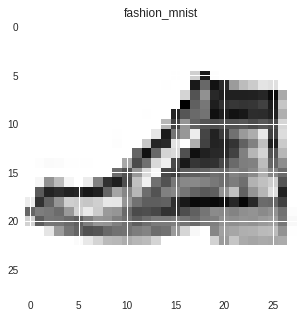

In [6]:
'''
- load fashin_minist dataset
- 10 classes 0-9
'''
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255
print('x_train shape: ',x_train.shape,', x_train data type: ', x_train.dtype)
print('x_test shape: ',x_test.shape,', x_test data type: ',x_test.dtype)
 
plt.figure(figsize=(5,5))
plt.imshow(x_train[258].reshape((28,28)).astype('float32'))
plt.title('fashion_mnist')
plt.show()

In [368]:
'''
- data pipeline from Numpy Arrays
- tf.data.Dataset.from_tensor_slices
'''
batch_size = 128
shuffle_buffer_size = 10000
tf.random.set_seed(5)
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(batch_size).shuffle(shuffle_buffer_size)
train_data = train_data.repeat()
test_data = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size).shuffle(shuffle_buffer_size)
test_data = test_data.repeat()

In [40]:
'''
- data pipline from Numpy with iterator
- tf.data.Dataset.from_tensor_slices
- tf.compat.v1.data.make_one_shot_iteraor
'''
batch_size = 128
shuffle_buffer_size = 10000
tf.random.set_seed(5)
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(batch_size).shuffle(shuffle_buffer_size)
test_data = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size).shuffle(shuffle_buffer_size)
train_iterator = tf.compat.v1.data.make_one_shot_iterator(train_data)
test_iterator = tf.compat.v1.data.make_one_shot_iterator(test_data)

tr_x,tr_y = train_iterator.get_next()
print('x shape:',tr_x.shape)
print('y shape:',tr_y.shape)
te_x,te_y = test_iterator.get_next()
print('x shape:',te_x.shape)
print('y shape:',te_y.shape)

x shape: (128, 28, 28, 1)
y shape: (128,)
x shape: (128, 28, 28, 1)
y shape: (128,)


In [108]:
'''
- data pipline from CSV file 
- tf.data.experimental.make_csv_dataset()
'''
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

In [109]:
train_dt = pd.read_csv(train_file_path)
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [110]:
test_dt = pd.read_csv(test_file_path)
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            264 non-null    int64  
 1   sex                 264 non-null    object 
 2   age                 264 non-null    float64
 3   n_siblings_spouses  264 non-null    int64  
 4   parch               264 non-null    int64  
 5   fare                264 non-null    float64
 6   class               264 non-null    object 
 7   deck                264 non-null    object 
 8   embark_town         264 non-null    object 
 9   alone               264 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 20.8+ KB


In [316]:
LABEL_COLUMN = 'survived'
LABELS = [0,1]

def get_csv_data(file_path, batch=3, **kwargs):
    csvData = tf.data.experimental.make_csv_dataset(
        file_pattern = file_path,
        batch_size = batch,
        label_name = LABEL_COLUMN,
        na_value = "?",
        num_epochs= 1,
        ignore_errors = True,
        **kwargs
    )
    return csvData

# load csv data
train_data = get_csv_data(train_file_path)
test_data = get_csv_data(test_file_path)

In [163]:
def show_batch(dataset):
    '''
    - take only one batch of data for the display -> dataset.take(1)
    - two batches data will be taken -> dataset.take(2)
    - {:20s} -> 20 spaces 
    ''' 
    for batch, label in dataset.take(1):
        for key, value in batch.items():
            print("{:20s}: {}".format(key,value.numpy()))
        print("\n{:20s}: {}".format('labels',label.numpy()))
            
show_batch(train_data)

sex                 : [b'male' b'female' b'female']
age                 : [32. 28. 39.]
n_siblings_spouses  : [0 1 1]
parch               : [0 0 1]
fare                : [ 56.4958 133.65    83.1583]
class               : [b'Third' b'First' b'First']
deck                : [b'unknown' b'unknown' b'E']
embark_town         : [b'Southampton' b'Southampton' b'Cherbourg']
alone               : [b'y' b'n' b'n']

labels              : [1 1 1]


In [124]:
'''
- column_names -> to name the columes if the dataset has no column names 
- select_columns -> to select which column of data will be extraced from csv
'''
temp_data = get_csv_data(train_file_path, column_names = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone'])
print('column_names example data: ')
show_batch(temp_data)

temp_data = get_csv_data(train_file_path, select_columns = ['survived','age','parch'])
print('\nselect_columns example data: ')
show_batch(temp_data)

column_names example data: 
sex                 : [b'male' b'female' b'female']
age                 : [24. 28. 45.]
n_siblings_spouses  : [0 3 1]
parch               : [0 1 1]
fare                : [ 13.      25.4667 164.8667]
class               : [b'Second' b'Third' b'First']
deck                : [b'unknown' b'unknown' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton']
alone               : [b'y' b'n' b'n']

labels              : [0 0 1]

select_columns example data: 
age                 : [28. 40. 33.]
parch               : [0 1 0]

labels              : [0 1 0]


In [299]:
'''
- load selected column data in one batch size
'''
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_csv_data(train_file_path, batch=10, select_columns=SELECT_COLUMNS, column_defaults = DEFAULTS)

show_batch(temp_dataset)

age                 : [ 3. 28. 29. 29. 28. 28. 22. 22. 45. 18.]
n_siblings_spouses  : [4. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
parch               : [2. 2. 1. 0. 0. 0. 0. 1. 1. 1.]
fare                : [ 31.3875  23.45    10.4625  26.       7.75     8.05     7.2292  55.
 164.8667  23.    ]

labels              : [1 0 0 1 1 0 0 1 1 1]


In [311]:
'''
- take one example batch
- The Python iter() function returns an iterator for the given object.
- iter(temp_datset) returns a tensorflow iterator
- example_batch -> tensor dictionary
- labels_batch -> tensor
'''
features, labels = next(iter(temp_dataset)) 
print('one batch data and labels:')
for key,values in features.items():
     print("{:15s}: {}".format(key,values.numpy()))
print("{:20s}: {}".format('labels',labels.numpy()))

'''
- stack rows from top to bottom to make a matrix 
'''
print('\nStack data rows:')
print(tf.stack(list(features.values()),axis=0).numpy())

one batch data and labels:
age            : [32. 28. 21. 18. 18. 29.  4.  1. 40. 18.]
n_siblings_spouses: [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
parch          : [0. 0. 0. 0. 0. 0. 2. 2. 0. 1.]
fare           : [ 8.3625  7.8792 77.9583  7.775  13.      9.5    22.025  20.575  31.
  7.8542]
labels              : [0 1 1 0 0 1 1 1 1 0]

Stack data rows:
[[32.     28.     21.     18.     18.     29.      4.      1.     40.
  18.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.      0.
   1.    ]
 [ 0.      0.      0.      0.      0.      0.      2.      2.      0.
   1.    ]
 [ 8.3625  7.8792 77.9583  7.775  13.      9.5    22.025  20.575  31.
   7.8542]]


In [312]:
'''
- define pack function 
- take features and labels in one batch of data
- return a stacked matrix and label pair
'''
def pack_rows (features, labels):
    return tf.stack(list(features.values()),axis=1),labels

packed_dataset = temp_dataset.map(pack_rows)

for features, labels in packed_dataset.take(1):
    print(features.numpy())
    print()
    print(labels.numpy())

[[ 48.      22.      35.      26.      28.      31.      17.      40.
   30.      19.    ]
 [  1.       0.       0.       0.       1.       1.       0.       0.
    0.       0.    ]
 [  0.       0.       0.       0.       0.       0.       0.       0.
    0.       2.    ]
 [ 39.6      9.35     7.05    56.4958  15.5    113.275    8.6625  31.
   10.5     26.2833]]

[1 0 0 1 0 1 0 1 0 1]


In [10]:
'''
- data pipline for TFRecord
'''
import tensorflow as tf
import numpy as np
import IPython.display as display

In [63]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


# generate serilize example of row data such as [False, 3, b'chicken', 589] in this function
def serialize_example(feature0, feature1, feature2, feature3):
    """
    Creates a tf.Example message ready to be written to a file.
    """
    # Create a dictionary mapping the feature name to the tf.Example-compatible
    feature = {
        'feature0': _int64_feature(feature0),
        'feature1': _int64_feature(feature1),
        'feature2': _bytes_feature(feature2),
        'feature3': _float_feature(feature3),
    }
    
    # Create a Features message using tf.train.Example.
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()


In [42]:
'''
- generate data compatible with tf.Example
- convert opt of tf.train.feature to a string
'''
# bytes_list
print(_bytes_feature(b'test_string'))
print(_bytes_feature(u'test_bytes'.encode('utf-8')))
# float_list
print(_float_feature(np.exp(1)))
# int64_list
print(_int64_feature(True))
print(_int64_feature(1))
# convert to string
print('\ntf.train.feature outputs: \n',_bytes_feature(b'this is a string...'))
print('tf.train.feature in string outputs: \n',_bytes_feature(b'this is a string...').SerializeToString())

bytes_list {
  value: "test_string"
}

bytes_list {
  value: "test_bytes"
}

float_list {
  value: 2.7182817459106445
}

int64_list {
  value: 1
}

int64_list {
  value: 1
}


tf.train.feature outputs: 
 bytes_list {
  value: "this is a string..."
}

tf.train.feature in string outputs: 
 b'\n\x15\n\x13this is a string...'


In [70]:
'''
- tf.Example messages
- create a numpy dataset
'''
# The number of observations in the dataset.
n_observations = int(1e4)
# Boolean feature, encoded as False or True.
feature_0 = np.random.choice([False, True], n_observations)
# Integer feature, random from 0 to 4.
feature_1 = np.random.randint(0, 5, n_observations)
# String feature
strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature_2 = strings[feature_1]
# Float feature, from a standard normal distribution
feature_3 = np.random.randn(n_observations)

# generate serilized_example
serialized_example = serialize_example(False, 4, b'goat', 0.9876)
print('''[False, 4, b'goat',0.9876]: \n''',serialized_example)

example_proto = tf.train.Example.FromString(serialized_example)
print('''\n[False, 4, b'goat',0.9876]: \n''',example_proto)

[False, 4, b'goat',0.9876]: 
 b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04[\xd3|?'

[False, 4, b'goat',0.9876]: 
 features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.9876000285148621
      }
    }
  }
}



In [78]:
'''
- tf.Example with cora dataset: https://relational.fit.cvut.cz/dataset/CORA
'''

with open(in_file, 'rU') as cora_content:
    for line in cora_content:
        entries = line.rstrip('\n').split('\t')

        # entries contains [ID, Word1, Word2, ..., Label]; 'Words' are 0/1 values.
        words = map(int, entries[1:-1])
        example_id = entries[0]
        features = {
            'id': _bytes_feature(example_id),
            'words': _int64_feature(*words),
            'label': _int64_feature(label_index[entries[-1]]),
        }
        example_features = tf.train.Example(features=tf.train.Features(feature=features))??????????????????

SyntaxError: invalid syntax (<ipython-input-78-99056d6660ed>, line 17)

In [343]:
'''
- one hot encoding
'''
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = tf.one_hot(y_train, depth=10)
y_train

<tf.Tensor: id=8413, shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

# tf.keras.layers.Layer and activation functions
## - tf.keras.layers.Layer custom definition (https://www.tensorflow.org/guide/keras/custom_layers_and_models#layers_encapsulate_a_state_weights_and_some_computation) use row matrix multiplication;
## - row[...] * mat [...] = row[...]
## - weight matrix shape is input_shape * units and this cannot be changed in the custom layer as it has to be consistentcy for further calculation

In [307]:
'''
- tf.random_normal_initializer
- tf.zeros_initializer
'''
tf.random.set_seed(15)
input_dim = (4,4)
init = tf.random_normal_initializer(mean=0.0, stddev=1)
init_zeros = tf.zeros_initializer()
print('initial weights: ',init(shape=input_dim, dtype=tf.float32))
print('initial zeros: ', init_zeros(shape=input_dim))

initial weights:  tf.Tensor(
[[ 0.40749726  0.02219561 -2.200683   -0.8212301 ]
 [-0.36420798 -2.177051   -0.8709116  -0.40788257]
 [ 0.37394255 -0.49891925 -0.00245201 -0.14541708]
 [ 0.56160647 -0.88500816 -0.12318895  0.7797051 ]], shape=(4, 4), dtype=float32)
initial zeros:  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float32)


In [615]:
'''
- single linear combination layer with self-defined weights, units -> output channels, input_shape -> input shape
- computation is max[...]*col[...] = col[...]
- **kwargs-> allowed_kwargs = {
                                'input_shape',
                                'batch_input_shape',
                                'batch_size',
                                'weights',
                                'activity_regularizer',
                                'autocast'
                            }
- 
'''
class customLayer(tf.keras.layers.Layer):
    #constructor
    def __init__(self, units = 3, input_shape=5, trainable=True, name=None, dtype=tf.float32, **kwargs):
        # parent constructor
        super(customLayer, self).__init__(name=name, dtype= dtype, trainable=trainable, **kwargs)
        # fields
        init_w = tf.random_normal_initializer(mean=0, stddev=1)
        init_b = tf.zeros_initializer()
        self.w = tf.Variable(init_w(shape=(units, input_shape),dtype=dtype), trainable=trainable)
        self.b = tf.Variable(init_b(shape=(units,)),dtype=dtype, trainable=trainable)       
    
    def call(self, inputs):
        if tf.rank(inputs)==1:
            inputs = tf.keras.backend.expand_dims(inputs, axis=1)
        return tf.matmul(self.w, inputs)+self.b

In [616]:
input_shape=4
units= 5
ipt = tf.ones((input_shape))
layer1 = customLayer(units=units, input_shape=input_shape, name='test')
print(f'input shape is at {input_shape} * 1: \n{ipt}')
print(f'\nlayer1 trainable weights is at {units}*{input_shape}: \n  {layer1.weights[0].numpy()}',)
print(f'\noutput channels is at {units}*1: \n {layer1(ipt).numpy()}')
print('\nlayer1 trainable bias: \n', layer1.weights[1].numpy())
print('\nlayer1 non-trainable weights:\n', layer1.non_trainable_weights)

input shape is at 4 * 1: 
[1. 1. 1. 1.]

layer1 trainable weights is at 5*4: 
  [[ 2.1618998   0.07567143  1.8947576   1.5536673 ]
 [-1.2869931  -0.81316155  0.6367824  -1.7842115 ]
 [ 0.32601485 -0.3001915  -0.73505306  0.06373952]
 [-0.6815776  -0.5778277   1.0000818   0.6779952 ]
 [ 0.38209513 -0.7653013  -0.3519354   0.03938751]]

output channels is at 5*1: 
 [[ 5.685996    5.685996    5.685996    5.685996    5.685996  ]
 [-3.2475839  -3.2475839  -3.2475839  -3.2475839  -3.2475839 ]
 [-0.64549017 -0.64549017 -0.64549017 -0.64549017 -0.64549017]
 [ 0.4186716   0.4186716   0.4186716   0.4186716   0.4186716 ]
 [-0.695754   -0.695754   -0.695754   -0.695754   -0.695754  ]]

layer1 trainable bias: 
 [0. 0. 0. 0. 0.]

layer1 non-trainable weights:
 []


In [630]:
'''
- Multi-layer Perceptron(MLP) layer
- subclass of tf.keras.layers.Layer class
- this layer has no batch size feature
- this layer use build() to identify the input shape on the runtime
- this layer use row multiplication caculation on weights and inputs
- add_weight(
        name=None, shape=None, dtype=None, initializer=None, regularizer=None,
        trainable=None, constraint=None, partitioner=None, use_resource=None,
        synchronization=tf.VariableSynchronization.AUTO,
        aggregation=tf.compat.v1.VariableAggregation.NONE, **kwargs
    )
- **kwargs: `getter`, 'collections`, `experimental_autocast` and `caching_device`.

'''
class MLP(tf.keras.layers.Layer):
    def __init__(self, units=3, activation=None, trainable=True, name=None, dtype=tf.float32, **kwargs):
        super(MLP, self).__init__( name=name, trainable = trainable, dtype=dtype, **kwargs)
        self.units = units;
        self.__activation_name = activation
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),initializer='random_normal')
    
    def get_config(self):
        config_dic ={
            'units':self.units,
            'activation': self.__activation_name, 
            'trainable_weights & bias':self.trainable_weights,
            'non-trainable_weights & bias':self.non_trainable_weights,
        }
        config = super(MLP,self).get_config()
        config.update(config_dic)
        return config
    
    def call(self, inputs, training = None):
        if tf.rank(inputs)==1:
            inputs = tf.keras.backend.expand_dims(inputs, axis=0)
        linear_combination = tf.matmul(inputs, self.w)+self.b 
        return self.activation(linear_combination)

In [631]:
'''
- get_config() function
- override get_config() in the tf.keras.layers.Layer
- "input_shape" in kwards is to generate "batch_input_shape" and it should be avoided in the custom layer
- instead, use build() to get the real input shape in the custom layer
'''
input_shape=4
units= 5
ipt = tf.ones((input_shape))
mlp = MLP(units=units, activation=None, name='mlp_single_layer', trainable=True)
opt = mlp(ipt)
mlp.get_config()

{'name': 'mlp_single_layer',
 'trainable': True,
 'dtype': 'float32',
 'units': 5,
 'activation': None,
 'trainable_weights & bias': [<tf.Variable 'mlp_single_layer/Variable:0' shape=(4, 5) dtype=float32, numpy=
  array([[-0.04268041, -0.0240161 , -0.00559446,  0.00667279,  0.05542039],
         [ 0.0149584 ,  0.04895762,  0.00866133, -0.03208294, -0.02934596],
         [ 0.12082821, -0.01217135,  0.06881073, -0.04737529, -0.01472751],
         [ 0.09234401, -0.05215368,  0.03285414, -0.01964135,  0.09214985]],
        dtype=float32)>,
  <tf.Variable 'mlp_single_layer/Variable:0' shape=(5,) dtype=float32, numpy=
  array([ 0.06843295,  0.02584788,  0.0653073 , -0.0641969 , -0.0261974 ],
        dtype=float32)>],
 'non-trainable_weights & bias': []}

In [632]:
'''
- single MLP layer computation
- without activation functions
- with build() to acquire input_shape
'''
input_shape=4
units= 5
ipt = tf.ones((input_shape))
mlp = MLP(units=units,activation=None, name='mlp_single_layer')
opt = mlp(ipt)
print(f'input shape is at {input_shape}: \n{ipt}')
print(f'\nlayer1 trainable weights is at {input_shape}*{units}: \n  {mlp.weights[0].numpy()}',)
print(f'\nlayer1 trainable bias is at {units}: \n  {mlp.weights[1].numpy()}',)
print(f'\noutput channels is at {units}: \n {mlp(ipt).numpy()}')
print('\nlayer1 non-trainable weights:\n', mlp.non_trainable_weights)

input shape is at 4: 
[1. 1. 1. 1.]

layer1 trainable weights is at 4*5: 
  [[-0.02856542  0.03515685 -0.06862309  0.07264601 -0.02461529]
 [-0.00546568 -0.04800047  0.15303433 -0.06815054  0.03404353]
 [-0.02024032  0.07377522  0.01931716  0.03163869  0.01544571]
 [-0.05890731 -0.13744293 -0.08588818 -0.01069717 -0.04543935]]

layer1 trainable bias is at 5: 
  [ 0.06411647  0.01416687  0.05103198 -0.03926305 -0.04594219]

output channels is at 5: 
 [[-0.04906226 -0.06234445  0.06887219 -0.01382606 -0.06650759]]

layer1 non-trainable weights:
 []


In [633]:
'''
- multiple MLP layers computation
- without activation functions
- with input_shape acquired by build() function
'''
tf.random.set_seed(15)
input_shape=5
ipt = tf.random.normal(shape=(input_shape,))
mlp1 = MLP(units=5, activation= None, name='mlp_layer1')
mlp2 = MLP(units=1, activation=None,  name='mlp_layer2')
opt = mlp1(ipt)
opt = mlp2(opt)
print('input:', ipt.numpy())
print('\nfinal output: ', opt.numpy())
print('\nmlp1 layer weights and bias: \n',[val.numpy() for val in mlp1.weights])
print('\nmlp2 layer weights and bias: \n',[val.numpy() for val in mlp2.weights])

input: [ 0.40749726  0.02219561 -2.200683   -0.8212301  -0.36420798]

final output:  [[0.00949545]]

mlp1 layer weights and bias: 
 [array([[-0.05752216, -0.01777615, -0.0443813 , -0.07142202,  0.03639229],
       [ 0.05079982,  0.01979304, -0.01862826, -0.01179774,  0.03318491],
       [-0.0077181 , -0.0696383 , -0.09101368, -0.00102651,  0.03367503],
       [-0.07211521,  0.02843316, -0.05534288, -0.08601289,  0.10155316],
       [-0.00349029, -0.05710344,  0.02195667,  0.02711194, -0.05647339]],
      dtype=float32), array([ 0.01557087,  0.06733529, -0.02465851, -0.09773596,  0.00385595],
      dtype=float32)]

mlp2 layer weights and bias: 
 [array([[-0.02640516],
       [ 0.02764253],
       [-0.0596687 ],
       [-0.02553965],
       [ 0.04818435]], dtype=float32), array([0.02116098], dtype=float32)]


In [639]:
'''
- multiple MLP with 'sigmoid' activation function
'''
tf.random.set_seed(15)
input_shape=5
ipt = tf.random.normal(shape=(input_shape,))
opt = MLP(units = 256, activation = 'relu')(ipt)
opt = MLP(units = 128, activation = 'relu')(ipt)
opt = MLP(units =10, activation= 'softmax')(opt)
print('output: \n',opt.numpy())

output: 
 [[0.08908382 0.09991569 0.10659099 0.10593536 0.09802915 0.08910162
  0.09953129 0.11073688 0.09931216 0.10176301]]


In [640]:
'''
- tf activation functions
- tf.keras.activations module
'''
ipt = tf.random.normal(shape=(1,10))
print('input is: \n', ipt.numpy())

linear_res = tf.keras.activations.get(None)(ipt)
print('\ndefault linear activation output: \n',linear_res.numpy())

sigmoid_res = tf.keras.activations.get('sigmoid')(ipt)
print('\nsigmoid activation output: \n',sigmoid_res.numpy())

tanh_res = tf.keras.activations.tanh(ipt)
print('\ntanh activation output: \n',tanh_res.numpy())

relu_res = tf.keras.activations.relu(ipt)
print('\nrelu activation output: \n',relu_res.numpy())

softmax_res = tf.keras.activations.softmax(ipt)
print('\nsoftmax activation output: \n',softmax_res.numpy())

input is: 
 [[ 0.19024122 -0.4606145  -0.13381146 -2.562121   -0.72492903  0.613187
  -0.15034355 -1.5807154   0.6264738   0.9457944 ]]

default linear activation output: 
 [[ 0.19024122 -0.4606145  -0.13381146 -2.562121   -0.72492903  0.613187
  -0.15034355 -1.5807154   0.6264738   0.9457944 ]]

sigmoid activation output: 
 [[0.5474174  0.38684008 0.46659696 0.07161635 0.32630855 0.64866745
  0.46248475 0.17069417 0.65168947 0.72026867]]

tanh activation output: 
 [[ 0.18797891 -0.43058494 -0.1330185  -0.98816895 -0.61995316  0.54636663
  -0.14922096 -0.91871357  0.5556194   0.7378732 ]]

relu activation output: 
 [[0.19024122 0.         0.         0.         0.         0.613187
  0.         0.         0.6264738  0.9457944 ]]

softmax activation output: 
 [[0.11373109 0.05932205 0.08225171 0.00725343 0.04554344 0.17360501
  0.08090309 0.01935363 0.17592703 0.24210948]]


# tf gradients and loss functions

In [150]:
'''
- batch = 1
- x is tf.constant and it is not trainable so tape.gradient() on x is not working, 
- weight and bias is tf.Variable and it is trainalbe
'''
x = tf.constant(2.0) 
weight = tf.Variable(2.0)
bias = tf.Variable(2.0)
with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    y = weight * x + bias
    
dy_dw = tape.gradient(y, weight)
dy_db = tape.gradient(y, bias)
    
print(f'dy_dw: {dy_dw},\ndy_db: {dy_db}')

dy_dw: 2.0,
dy_db: 1.0


In [149]:
'''
- btach = 3
- x is tf.constant and it is not trainable so tape.gradient() on x is not working, 
- weight and bias is tf.Variable and it is trainalbe
'''
x = tf.constant([[2],[2],[2]], dtype=tf.float32) 
weight = tf.Variable(2, dtype=tf.float32)
bias = tf.Variable(2, dtype=tf.float32)
with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    y = weight * x + bias
    
dy_dw = tape.gradient(y, weight)
dy_db = tape.gradient(y, bias)

print(y)
print(f'dy_dw: {dy_dw},\ndy_db: {dy_db}')

tf.Tensor(
[[6.]
 [6.]
 [6.]], shape=(3, 1), dtype=float32)
dy_dw: 6.0,
dy_db: 3.0


In [151]:
'''
- batch =1
- gradients for nested calculation function 
'''
x = tf.constant(2.0) 
weight = tf.Variable(2, dtype=tf.float32)
weight2 = tf.Variable(2, dtype=tf.float32)
bias = tf.Variable(2.0, dtype=tf.float32)

def y1 (weight, bias, x):
    return weight * x + bias

def y1_square(x):
    return weight2*x**2

with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    y = y1_square(y1(weight, bias, x))   
    
dy_dw = tape.gradient(y, weight)
dy_dw2 = tape.gradient(y, weight2)
dy_db = tape.gradient(y, bias)
    
print(f'dy_dw: {dy_dw},\ndy_dw2:{dy_dw2},\ndy_db: {dy_db}')


dy_dw: 48.0,
dy_dw2:36.0,
dy_db: 24.0


In [154]:
'''
- btach = 1
- gradients on linear combination function with 1-dim weights
'''
ipt = tf.Variable([[1,2,3]],dtype=tf.float32) 
w = tf.Variable([[1],[2],[3]],dtype=tf.float32)
b = tf.Variable([1],dtype=tf.float32)

def linear_combination(ipt,weight,bias):
    return tf.matmul(ipt,weight)+bias

with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    y = linear_combination(ipt,w,b)
dy_dw = tape.gradient(y, w)
dy_db = tape.gradient(y, b)
    
print(f'dy_dw:\n{dy_dw},\ndy_db:\n{dy_db}')

dy_dw:
[[1.]
 [2.]
 [3.]],
dy_db:
[1.]


In [153]:
'''
- multiple inputs on a logistic regression calculation with multiple outpus
- binary_cross_entropy for the loss
'''
tf.random.set_seed(2)
init = tf.random_normal_initializer(mean=0.0, stddev=1)
ipt = tf.Variable(initial_value=init(shape=(1,5),dtype=tf.float32)) 
w = tf.Variable(initial_value= init(shape=(5,3),dtype=tf.float32))
b = tf.Variable(initial_value= init(shape=(1,3),dtype=tf.float32))
target = tf.Variable(initial_value = init(shape=(1,3),dtype= tf.float32))

def logistic_regression(ipt,weight,bias):
    return tf.keras.activations.sigmoid(tf.matmul(ipt,weight)+bias)

def cross_entropy_loss(label,predict):
    loss =  tf.keras.losses.BinaryCrossentropy()
    return loss(label,predict)

with tf.GradientTape(persistent = True, watch_accessed_variables=True) as tape:
    loss = cross_entropy_loss(target,logistic_regression(ipt,w,b))
dy_dw = tape.gradient(loss, w)
dy_db = tape.gradient(loss, b)
    
print(f'dy_dw:\n{dy_dw},\ndy_db:\n{dy_db}')

dy_dw:
[[ 4.0688735e-01  1.2480556e-02  1.3418210e-01]
 [-1.7811962e+00 -5.4635078e-02 -5.8739763e-01]
 [ 1.2863358e+00  3.9456099e-02  4.2420402e-01]
 [-9.7072709e-01 -2.9775353e-02 -3.2012349e-01]
 [-8.9167268e-04 -2.7350497e-05 -2.9405317e-04]],
dy_db:
[[0.9328666  0.02861405 0.30763796]]


# tf.keras custom model training I
### - training a small dataset with stochastic gradient decent
### - loss function is mean least square
### - MLP model to simulate a linear combination

In [5]:
'''
- MLP layer
'''
class MLP(tf.keras.layers.Layer):
    def __init__(self, units=3, activation=None, trainable=True, name=None, dtype=tf.float32, **kwargs):
        super(MLP, self).__init__( name=name, trainable = trainable, dtype=dtype, **kwargs)
        self.units = units
        self.__activation_name = activation
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',)
        self.b = self.add_weight(shape=(self.units,),initializer='random_normal')
        
    def get_config(self):
        config_dic ={
            'units':self.units,
            'activation': self.__activation_name, 
            'trainable_weights & bias':self.trainable_weights,
            'non-trainable_weights & bias':self.non_trainable_weights,
        }
        config = super(MLP,self).get_config()
        config.update(config_dic)
        return config
    
    def call(self, inputs, training = None):
        if tf.rank(inputs)==1:
            inputs = tf.keras.backend.expand_dims(inputs, axis=0)
        linear_combination = tf.matmul(inputs, self.w)+self.b 
        return self.activation(linear_combination)

In [18]:
'''
- subclass model
'''
class MLP_Model(tf.keras.Model):
    def __init__(self, **kwargs):
        super(MLP_Model, self).__init__(self, **kwargs)
        self.mlp1 = MLP(5)
        self.mlp2 = MLP(1)
        
    def call(self, inputs):
        opt = self.mlp1(inputs)
        opt = self.mlp2(opt)
        return opt

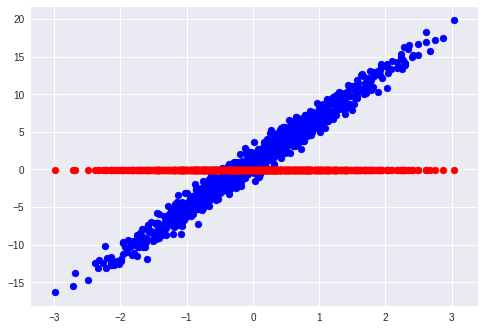

In [25]:
'''
- generate random data 
'''
# define random data
w = 6
b = 1
batch = 1000
inputs  = tf.random.normal(shape=(batch,1), mean=0, stddev=1)
noise   = tf.random.normal(shape=(batch,1), mean=0, stddev=1)
outputs = inputs * w + b + noise

# plotting 
model = MLP_Model()
plt.scatter(inputs,outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

final epoch: 50, loss: 0.9573383331298828


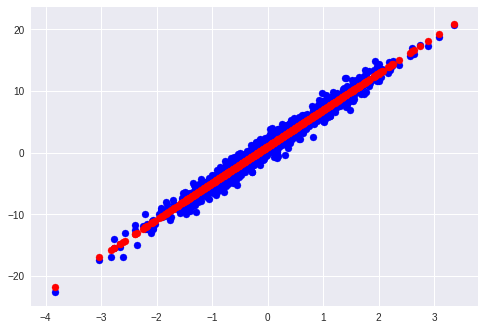

In [23]:
'''
- custom model training with SGD and mean square loss function
'''
# define model
model = MLP_Model()

# define loss
mean_square_loss = tf.keras.losses.MeanSquaredError()

# gradient function -> return loss -> return gradients
def get_grad(target, model, data):
    with tf.GradientTape() as tape:
        loss = mean_square_loss(target, model(data))
    return loss, tape.gradient(loss, model.trainable_variables)

# define optimizer
SGD = tf.keras.optimizers.SGD(learning_rate=0.01)

# training process
num_epochs = 50
for _ in range(num_epochs):
    loss, grad = get_grad(outputs, model, inputs)
    SGD.apply_gradients(zip(grad, model.trainable_variables))
print(f'final epoch: {SGD.iterations.numpy()}, loss: {loss}')

# plotting 
plt.scatter(inputs,outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

# tf.keras custom model training II
## - training model a formal dataset with batches 
## - loss function is categorial cross entropy
## - optimizer is SGD

In [37]:
# load tensorflow built in dataset
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

data = pd.read_csv(train_dataset_url)
data.head()

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   120         120 non-null    float64
 1   4           120 non-null    float64
 2   setosa      120 non-null    float64
 3   versicolor  120 non-null    float64
 4   virginica   120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [39]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))
print(f"Label classes:{class_names}")

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
Label classes:['Iris setosa', 'Iris versicolor', 'Iris virginica']


In [40]:
# rename the dataset column name
data = data.rename(columns={'120': "sepal_length", '4': "sepal_width", 'setosa': "petal_length",'versicolor':'petal_width','virginica':'species'})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


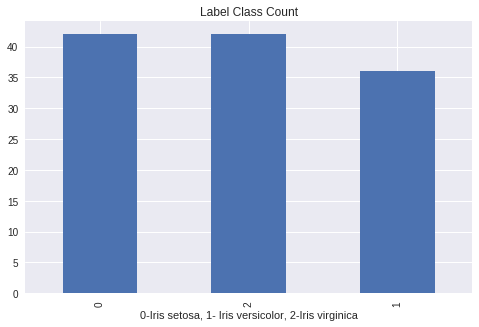

In [41]:
# count label classes
data['species'].value_counts().sort_values(ascending=False).plot.bar(figsize=(8,5))
plt.title('Label Class Count')
plt.xlabel('0-Iris setosa, 1- Iris versicolor, 2-Iris virginica')
plt.show()

In [42]:
'''
- data normalization -> Z score
'''
for name, value in data.iteritems():
    if name is not 'species':
        print(name)
        print(value.mean())
        print(value.std())
        data[name] = (data[name]-value.mean())/ value.std()

sepal_length
5.845000000000001
0.8685784774150068
sepal_width
3.064999999999999
0.4271559257155984
petal_length
3.739166666666667
1.822100359444549
petal_width
1.196666666666666
0.7820392791757137


In [65]:
data.to_csv('./processed_data.csv', index=False)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.638975,-0.620382,1.021257,1.282971,2
1,-0.972854,-1.790915,-0.241022,-0.251479,1
2,-1.087985,-1.322702,0.417558,0.643616,2
3,-1.087985,0.081937,-1.228893,-1.402317,0
4,-0.166939,1.720683,-1.119130,-1.146575,0


In [66]:
'''
- generate csv file data pipeline with tf.data.Dataset
'''
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

dataCSV = tf.data.experimental.make_csv_dataset(
    file_pattern = './processed_data.csv', 
    batch_size = 32,
    column_names= column_names, 
    select_columns= None,
    label_name= 'species', 
    num_epochs = 1,
    shuffle=True,
    shuffle_buffer_size=100, 
)
dataCSV

<PrefetchDataset shapes: (OrderedDict([(sepal_length, (None,)), (sepal_width, (None,)), (petal_length, (None,)), (petal_width, (None,))]), (None,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [67]:
'''
- print one batch data and labels
'''
features, labels = next(iter(dataCSV))
for key, value in features.items():
    print(key,":\n",value.numpy())
print('labels:\n',labels.numpy())

sepal_length :
 [ 0.06332185 -1.3182459   2.1356735   1.5600202  -0.05180879  0.984367
 -0.97285396 -0.8577233  -0.97285396 -0.51233137 -0.39720073 -1.0879846
  0.86923635 -1.4333766   2.1356735  -0.16693944 -0.97285396 -0.8577233
 -0.51233137 -0.05180879  1.0994977  -0.39720073 -1.4333766  -0.8577233
  1.2146283   0.5238444   0.29358315 -0.05180879 -1.0879846  -0.39720073
  0.29358315 -0.16693944]
sepal_width :
 [ 0.31604385  0.31604385 -0.15216926  0.31604385 -0.8544889  -0.15216926
 -1.7909151   1.7206831   0.31604385 -0.15216926  1.0183635  -1.5568086
 -0.3862758   0.08193729 -0.62038237  1.7206831  -2.4932349   1.7206831
  1.9547896  -1.0885955   0.31604385 -1.0885955   1.25247     1.7206831
  0.08193729  0.5501504  -0.62038237 -0.8544889  -1.322702   -1.5568086
 -0.15216926 -0.62038237]
petal_length :
 [ 0.58220357 -1.3386565   1.2956659   1.2407842   0.7468487   0.691967
 -0.24102221 -1.2288932  -1.3935384   0.4175584  -1.3386565  -0.24102221
  0.47244012 -1.2288932   1.6249563 

In [68]:
'''
- pack data into tensor 
'''
def pack_rows (features, labels):
    labels = tf.one_hot(labels, 3)
    return tf.stack(list(features.values()),axis=1),labels

packed_dataset = dataCSV.map(pack_rows)

In [69]:
features, labels = next(iter(packed_dataset))
print('features: \n',features[:10])
print('labels: \n',labels[:10])

features: 
 tf.Tensor(
[[ 2.0205429  -0.15216926  1.5700746   1.1550997 ]
 [ 0.06332185 -0.15216926  0.7468487   0.77148724]
 [-1.0879846  -1.5568086  -0.24102221 -0.25147927]
 [ 0.6389751   0.31604385  0.85661215  1.4108413 ]
 [ 1.6751509  -0.3862758   1.4054294   0.77148724]
 [ 1.0994977  -0.15216926  0.9663756   1.1550997 ]
 [-0.05180879 -0.62038237  0.7468487   1.5387121 ]
 [-0.51233137  0.78425694 -1.2288932  -1.0187042 ]
 [-0.8577233   1.7206831  -1.0093663  -1.0187042 ]
 [ 0.17845249 -0.8544889   0.7468487   0.51574564]], shape=(10, 4), dtype=float32)
labels: 
 tf.Tensor(
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]], shape=(10, 3), dtype=float32)


In [70]:
'''
- build model with tf.kers API
'''
def get_model():
    ipt = tf.keras.Input(shape=(4,))
    opt = tf.keras.layers.Dense(32, activation='relu')(ipt)
    opt = tf.keras.layers.Dense(16, activation='relu')(opt)
    opt = tf.keras.layers.Dense(3, activation='softmax')(opt)
    model = tf.keras.Model(ipt, opt)
    return model
model = get_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


In [71]:
'''
- custom training process
- batch_size -> 32
- num_epochs -> 1 -> dataset will be repeated 1 time per epoch
- loss -> categorical_cross_entroty
- optimizer -> SGD
'''
loss_func = tf.keras.losses.CategoricalCrossentropy()# define optimizer
SGD = tf.keras.optimizers.SGD(learning_rate=0.01)

def grad(target, model, data):
    with tf.GradientTape() as tape: 
        loss = loss_func(target, model(data))
    return loss, tape.gradient(loss, model.trainable_variables)

def train_model(epochs, model, packed_dataset):
    history_acc = []
    history_loss = []
    for _ in range(epochs):
        step_loss = tf.keras.metrics.Mean()
        step_acc = tf.keras.metrics.CategoricalCrossentropy()
        '''
        - train model for steps per epoch
        '''
        for x,y in packed_dataset: 
            '''
            - calculate loss and grad
            - update weights with grad
            '''
            loss, gradient = grad(y, model, x)
            SGD.apply_gradients(zip(gradient, model.trainable_variables))
            '''
            - record each step loss and acc
            '''
            step_loss.update_state(loss)
            step_acc.update_state(y, model(x, training = True))
        '''
        - record training loss and acc per epochs
        '''
        history_loss.append(step_loss.result())
        history_acc.append(1-step_acc.result())
        
        print(f'Epoch: {_}, Loss: {step_loss.result()}, Acc: {1-step_acc.result()}')
    return history_acc, history_loss

In [72]:
model = get_model()
epochs = 2000
history_acc, history_loss = train_model(epochs, model, packed_dataset)

Epoch: 0, Loss: 1.1046162843704224, Acc: -0.09449243545532227
Epoch: 1, Loss: 1.0682268142700195, Acc: -0.06209743022918701
Epoch: 2, Loss: 1.0405062437057495, Acc: -0.03126382827758789
Epoch: 3, Loss: 1.0094778537750244, Acc: -0.0031818151473999023
Epoch: 4, Loss: 0.9870929718017578, Acc: 0.023600757122039795
Epoch: 5, Loss: 0.9603358507156372, Acc: 0.04712611436843872
Epoch: 6, Loss: 0.9367320537567139, Acc: 0.07090336084365845
Epoch: 7, Loss: 0.9129051566123962, Acc: 0.09260743856430054
Epoch: 8, Loss: 0.8922386765480042, Acc: 0.11384975910186768
Epoch: 9, Loss: 0.8714143633842468, Acc: 0.13338381052017212
Epoch: 10, Loss: 0.8540022373199463, Acc: 0.15213745832443237
Epoch: 11, Loss: 0.8340117335319519, Acc: 0.16998648643493652
Epoch: 12, Loss: 0.8134689927101135, Acc: 0.18735593557357788
Epoch: 13, Loss: 0.800219714641571, Acc: 0.20406723022460938
Epoch: 14, Loss: 0.7856563329696655, Acc: 0.21973997354507446
Epoch: 15, Loss: 0.7673563957214355, Acc: 0.23575764894485474
Epoch: 16, L

Epoch: 136, Loss: 0.2509969174861908, Acc: 0.7584960460662842
Epoch: 137, Loss: 0.23826153576374054, Acc: 0.7593212723731995
Epoch: 138, Loss: 0.2415366768836975, Acc: 0.7604374289512634
Epoch: 139, Loss: 0.2435564547777176, Acc: 0.7618557214736938
Epoch: 140, Loss: 0.24261361360549927, Acc: 0.762946367263794
Epoch: 141, Loss: 0.23557449877262115, Acc: 0.7640283107757568
Epoch: 142, Loss: 0.2351302206516266, Acc: 0.7651127576828003
Epoch: 143, Loss: 0.23241187632083893, Acc: 0.7668710350990295
Epoch: 144, Loss: 0.24052685499191284, Acc: 0.7674344182014465
Epoch: 145, Loss: 0.22950895130634308, Acc: 0.7686755061149597
Epoch: 146, Loss: 0.23090487718582153, Acc: 0.7698234915733337
Epoch: 147, Loss: 0.22773055732250214, Acc: 0.7707839012145996
Epoch: 148, Loss: 0.22364528477191925, Acc: 0.7718387842178345
Epoch: 149, Loss: 0.22400619089603424, Acc: 0.772962212562561
Epoch: 150, Loss: 0.2256188839673996, Acc: 0.774070143699646
Epoch: 151, Loss: 0.22358618676662445, Acc: 0.7752547264099121


Epoch: 268, Loss: 0.13027983903884888, Acc: 0.870894730091095
Epoch: 269, Loss: 0.12864431738853455, Acc: 0.8712366819381714
Epoch: 270, Loss: 0.13162153959274292, Acc: 0.8717479705810547
Epoch: 271, Loss: 0.127543106675148, Acc: 0.8721824288368225
Epoch: 272, Loss: 0.12682588398456573, Acc: 0.8731070160865784
Epoch: 273, Loss: 0.12718833982944489, Acc: 0.8736627101898193
Epoch: 274, Loss: 0.13120177388191223, Acc: 0.8738045692443848
Epoch: 275, Loss: 0.1227780431509018, Acc: 0.8743082284927368
Epoch: 276, Loss: 0.12584787607192993, Acc: 0.8752442598342896
Epoch: 277, Loss: 0.12310853600502014, Acc: 0.8754944205284119
Epoch: 278, Loss: 0.12296003103256226, Acc: 0.876136064529419
Epoch: 279, Loss: 0.12341451644897461, Acc: 0.8762497305870056
Epoch: 280, Loss: 0.12218321114778519, Acc: 0.8767693042755127
Epoch: 281, Loss: 0.12139838188886642, Acc: 0.8771736025810242
Epoch: 282, Loss: 0.1250283569097519, Acc: 0.8780462145805359
Epoch: 283, Loss: 0.11974052339792252, Acc: 0.878336310386657

Epoch: 399, Loss: 0.0863490030169487, Acc: 0.9148293733596802
Epoch: 400, Loss: 0.09210142493247986, Acc: 0.9150031208992004
Epoch: 401, Loss: 0.08320498466491699, Acc: 0.9154606461524963
Epoch: 402, Loss: 0.08460366725921631, Acc: 0.9154173135757446
Epoch: 403, Loss: 0.08457329869270325, Acc: 0.9160114526748657
Epoch: 404, Loss: 0.08369464427232742, Acc: 0.9157159328460693
Epoch: 405, Loss: 0.08228704333305359, Acc: 0.9160581231117249
Epoch: 406, Loss: 0.08453172445297241, Acc: 0.9162968397140503
Epoch: 407, Loss: 0.08315912634134293, Acc: 0.916325569152832
Epoch: 408, Loss: 0.0867934599518776, Acc: 0.9176750183105469
Epoch: 409, Loss: 0.08338426798582077, Acc: 0.9167978763580322
Epoch: 410, Loss: 0.08731330931186676, Acc: 0.9174618721008301
Epoch: 411, Loss: 0.08346523344516754, Acc: 0.91765958070755
Epoch: 412, Loss: 0.07982691377401352, Acc: 0.9174597859382629
Epoch: 413, Loss: 0.08418747037649155, Acc: 0.9180116057395935
Epoch: 414, Loss: 0.08183805644512177, Acc: 0.91825014352798

Epoch: 533, Loss: 0.06382302939891815, Acc: 0.9339364767074585
Epoch: 534, Loss: 0.06473378092050552, Acc: 0.9341889023780823
Epoch: 535, Loss: 0.07060284912586212, Acc: 0.9342769384384155
Epoch: 536, Loss: 0.06314326077699661, Acc: 0.9342191219329834
Epoch: 537, Loss: 0.06407587975263596, Acc: 0.9348191022872925
Epoch: 538, Loss: 0.06356791406869888, Acc: 0.9345099329948425
Epoch: 539, Loss: 0.06712900847196579, Acc: 0.935076117515564
Epoch: 540, Loss: 0.06299886107444763, Acc: 0.9347116947174072
Epoch: 541, Loss: 0.07126247882843018, Acc: 0.9347881078720093
Epoch: 542, Loss: 0.06400861591100693, Acc: 0.9347689151763916
Epoch: 543, Loss: 0.06567400693893433, Acc: 0.9356257915496826
Epoch: 544, Loss: 0.06562497466802597, Acc: 0.9348294734954834
Epoch: 545, Loss: 0.06495223939418793, Acc: 0.9357224106788635
Epoch: 546, Loss: 0.06520947813987732, Acc: 0.9351329803466797
Epoch: 547, Loss: 0.06278015673160553, Acc: 0.9352043271064758
Epoch: 548, Loss: 0.06368283927440643, Acc: 0.9355216026

Epoch: 665, Loss: 0.05674665793776512, Acc: 0.9441694617271423
Epoch: 666, Loss: 0.05922481417655945, Acc: 0.9439395070075989
Epoch: 667, Loss: 0.05824744701385498, Acc: 0.9441211819648743
Epoch: 668, Loss: 0.05734671652317047, Acc: 0.9440871477127075
Epoch: 669, Loss: 0.055814098566770554, Acc: 0.9440049529075623
Epoch: 670, Loss: 0.05472322180867195, Acc: 0.9441719055175781
Epoch: 671, Loss: 0.05347197875380516, Acc: 0.9441102743148804
Epoch: 672, Loss: 0.05970486253499985, Acc: 0.9445708394050598
Epoch: 673, Loss: 0.05446884408593178, Acc: 0.944560170173645
Epoch: 674, Loss: 0.054408274590969086, Acc: 0.9445551633834839
Epoch: 675, Loss: 0.05356895551085472, Acc: 0.9443528652191162
Epoch: 676, Loss: 0.05427231267094612, Acc: 0.9445979595184326
Epoch: 677, Loss: 0.058212146162986755, Acc: 0.9446650147438049
Epoch: 678, Loss: 0.05707681179046631, Acc: 0.9445685744285583
Epoch: 679, Loss: 0.05471542850136757, Acc: 0.9451181888580322
Epoch: 680, Loss: 0.0540221706032753, Acc: 0.94462740

Epoch: 797, Loss: 0.048744700849056244, Acc: 0.9499186277389526
Epoch: 798, Loss: 0.04932372272014618, Acc: 0.9499800801277161
Epoch: 799, Loss: 0.052062518894672394, Acc: 0.950975775718689
Epoch: 800, Loss: 0.050705477595329285, Acc: 0.9503576755523682
Epoch: 801, Loss: 0.049564532935619354, Acc: 0.9499832391738892
Epoch: 802, Loss: 0.04979686811566353, Acc: 0.9510863423347473
Epoch: 803, Loss: 0.05024643987417221, Acc: 0.9508743286132812
Epoch: 804, Loss: 0.05202683061361313, Acc: 0.9502168893814087
Epoch: 805, Loss: 0.049476731568574905, Acc: 0.9507651329040527
Epoch: 806, Loss: 0.05099417641758919, Acc: 0.9505273103713989
Epoch: 807, Loss: 0.04913914203643799, Acc: 0.9503045082092285
Epoch: 808, Loss: 0.04930766671895981, Acc: 0.9504245519638062
Epoch: 809, Loss: 0.05032163858413696, Acc: 0.9503446221351624
Epoch: 810, Loss: 0.04889924079179764, Acc: 0.9510545134544373
Epoch: 811, Loss: 0.048201773315668106, Acc: 0.950576663017273
Epoch: 812, Loss: 0.047747060656547546, Acc: 0.9504

Epoch: 928, Loss: 0.049582820385694504, Acc: 0.954723060131073
Epoch: 929, Loss: 0.04815281182527542, Acc: 0.9543078541755676
Epoch: 930, Loss: 0.046931471675634384, Acc: 0.9544374346733093
Epoch: 931, Loss: 0.046012360602617264, Acc: 0.9543457627296448
Epoch: 932, Loss: 0.04483450576663017, Acc: 0.9546314477920532
Epoch: 933, Loss: 0.045332614332437515, Acc: 0.9546685218811035
Epoch: 934, Loss: 0.04529143124818802, Acc: 0.9548842906951904
Epoch: 935, Loss: 0.045945871621370316, Acc: 0.9547639489173889
Epoch: 936, Loss: 0.04351077228784561, Acc: 0.9544704556465149
Epoch: 937, Loss: 0.04398595541715622, Acc: 0.9544357657432556
Epoch: 938, Loss: 0.045206218957901, Acc: 0.95491623878479
Epoch: 939, Loss: 0.04424717277288437, Acc: 0.9545133709907532
Epoch: 940, Loss: 0.0445111021399498, Acc: 0.9547798037528992
Epoch: 941, Loss: 0.04900689795613289, Acc: 0.9545283913612366
Epoch: 942, Loss: 0.045679252594709396, Acc: 0.954677164554596
Epoch: 943, Loss: 0.04596559330821037, Acc: 0.9551575183

Epoch: 1060, Loss: 0.04197647050023079, Acc: 0.9577915668487549
Epoch: 1061, Loss: 0.04320617392659187, Acc: 0.9576926827430725
Epoch: 1062, Loss: 0.04276007041335106, Acc: 0.9579102396965027
Epoch: 1063, Loss: 0.046360548585653305, Acc: 0.958138108253479
Epoch: 1064, Loss: 0.042787764221429825, Acc: 0.9576410055160522
Epoch: 1065, Loss: 0.043788544833660126, Acc: 0.9575226902961731
Epoch: 1066, Loss: 0.040714479982852936, Acc: 0.9575331807136536
Epoch: 1067, Loss: 0.04637376219034195, Acc: 0.9577609896659851
Epoch: 1068, Loss: 0.041677866131067276, Acc: 0.9580589532852173
Epoch: 1069, Loss: 0.0473497100174427, Acc: 0.9585845470428467
Epoch: 1070, Loss: 0.04294339567422867, Acc: 0.958307147026062
Epoch: 1071, Loss: 0.04619130119681358, Acc: 0.957909345626831
Epoch: 1072, Loss: 0.042222797870635986, Acc: 0.9579765796661377
Epoch: 1073, Loss: 0.04774715006351471, Acc: 0.9577188491821289
Epoch: 1074, Loss: 0.04869195818901062, Acc: 0.9581979513168335
Epoch: 1075, Loss: 0.04184877127408981

Epoch: 1188, Loss: 0.04231022670865059, Acc: 0.9600300788879395
Epoch: 1189, Loss: 0.039463698863983154, Acc: 0.9599317908287048
Epoch: 1190, Loss: 0.04089133068919182, Acc: 0.960344672203064
Epoch: 1191, Loss: 0.0410623736679554, Acc: 0.9600252509117126
Epoch: 1192, Loss: 0.038919635117053986, Acc: 0.9603235721588135
Epoch: 1193, Loss: 0.04051685333251953, Acc: 0.9598429203033447
Epoch: 1194, Loss: 0.04033074527978897, Acc: 0.9600397348403931
Epoch: 1195, Loss: 0.04072115570306778, Acc: 0.9605698585510254
Epoch: 1196, Loss: 0.03823085129261017, Acc: 0.9601638317108154
Epoch: 1197, Loss: 0.04060857743024826, Acc: 0.9604958891868591
Epoch: 1198, Loss: 0.039621978998184204, Acc: 0.9601490497589111
Epoch: 1199, Loss: 0.03994259983301163, Acc: 0.9603786468505859
Epoch: 1200, Loss: 0.03821659833192825, Acc: 0.9601097702980042
Epoch: 1201, Loss: 0.038959354162216187, Acc: 0.960352897644043
Epoch: 1202, Loss: 0.04106931760907173, Acc: 0.9602228999137878
Epoch: 1203, Loss: 0.03965378552675247,

Epoch: 1316, Loss: 0.03867260366678238, Acc: 0.9621997475624084
Epoch: 1317, Loss: 0.03894815593957901, Acc: 0.9618508219718933
Epoch: 1318, Loss: 0.038558658212423325, Acc: 0.9625681042671204
Epoch: 1319, Loss: 0.0411248579621315, Acc: 0.9619047045707703
Epoch: 1320, Loss: 0.04185827076435089, Acc: 0.9621927738189697
Epoch: 1321, Loss: 0.036365609616041183, Acc: 0.9619978666305542
Epoch: 1322, Loss: 0.041270479559898376, Acc: 0.9619336724281311
Epoch: 1323, Loss: 0.03836054727435112, Acc: 0.961994469165802
Epoch: 1324, Loss: 0.039248719811439514, Acc: 0.9626588821411133
Epoch: 1325, Loss: 0.03773452341556549, Acc: 0.9619327783584595
Epoch: 1326, Loss: 0.03797797113656998, Acc: 0.9619006514549255
Epoch: 1327, Loss: 0.03731004148721695, Acc: 0.9622682332992554
Epoch: 1328, Loss: 0.03740378096699715, Acc: 0.9622653126716614
Epoch: 1329, Loss: 0.037600528448820114, Acc: 0.9620897173881531
Epoch: 1330, Loss: 0.0387168787419796, Acc: 0.9622297286987305
Epoch: 1331, Loss: 0.03683293983340263

Epoch: 1444, Loss: 0.03735978528857231, Acc: 0.9637331366539001
Epoch: 1445, Loss: 0.03816636651754379, Acc: 0.9636300206184387
Epoch: 1446, Loss: 0.03492366895079613, Acc: 0.9636985063552856
Epoch: 1447, Loss: 0.036744728684425354, Acc: 0.9646150469779968
Epoch: 1448, Loss: 0.036650151014328, Acc: 0.9636473655700684
Epoch: 1449, Loss: 0.03665651008486748, Acc: 0.9639632701873779
Epoch: 1450, Loss: 0.03586127609014511, Acc: 0.9636449217796326
Epoch: 1451, Loss: 0.03910357505083084, Acc: 0.9636911153793335
Epoch: 1452, Loss: 0.04151838272809982, Acc: 0.9637733697891235
Epoch: 1453, Loss: 0.040453605353832245, Acc: 0.9635223150253296
Epoch: 1454, Loss: 0.03688650205731392, Acc: 0.964036762714386
Epoch: 1455, Loss: 0.037442728877067566, Acc: 0.9642236232757568
Epoch: 1456, Loss: 0.03678596764802933, Acc: 0.9642439484596252
Epoch: 1457, Loss: 0.03915431350469589, Acc: 0.9639459848403931
Epoch: 1458, Loss: 0.036934979259967804, Acc: 0.9639638066291809
Epoch: 1459, Loss: 0.03676239401102066,

Epoch: 1572, Loss: 0.039484910666942596, Acc: 0.9654375910758972
Epoch: 1573, Loss: 0.03471151739358902, Acc: 0.9651487469673157
Epoch: 1574, Loss: 0.03531291335821152, Acc: 0.9657282829284668
Epoch: 1575, Loss: 0.03593268245458603, Acc: 0.9652243256568909
Epoch: 1576, Loss: 0.039546940475702286, Acc: 0.965268611907959
Epoch: 1577, Loss: 0.03571462631225586, Acc: 0.9657254815101624
Epoch: 1578, Loss: 0.037520430982112885, Acc: 0.9653319120407104
Epoch: 1579, Loss: 0.0358227863907814, Acc: 0.9654011130332947
Epoch: 1580, Loss: 0.03412361070513725, Acc: 0.9651638269424438
Epoch: 1581, Loss: 0.03506889194250107, Acc: 0.9653465747833252
Epoch: 1582, Loss: 0.03483499586582184, Acc: 0.9651838541030884
Epoch: 1583, Loss: 0.03329433873295784, Acc: 0.9653268456459045
Epoch: 1584, Loss: 0.03737204149365425, Acc: 0.9655446410179138
Epoch: 1585, Loss: 0.03730859234929085, Acc: 0.9654902219772339
Epoch: 1586, Loss: 0.03414763882756233, Acc: 0.965399444103241
Epoch: 1587, Loss: 0.034535739570856094,

Epoch: 1703, Loss: 0.03317217901349068, Acc: 0.9663910269737244
Epoch: 1704, Loss: 0.03422693908214569, Acc: 0.9670119285583496
Epoch: 1705, Loss: 0.03316250815987587, Acc: 0.9666394591331482
Epoch: 1706, Loss: 0.033407408744096756, Acc: 0.9666862487792969
Epoch: 1707, Loss: 0.03412821888923645, Acc: 0.9668906927108765
Epoch: 1708, Loss: 0.03801189363002777, Acc: 0.9669438600540161
Epoch: 1709, Loss: 0.03247680142521858, Acc: 0.9665040373802185
Epoch: 1710, Loss: 0.0346984826028347, Acc: 0.9666257500648499
Epoch: 1711, Loss: 0.03355979174375534, Acc: 0.9665165543556213
Epoch: 1712, Loss: 0.034456755965948105, Acc: 0.967126727104187
Epoch: 1713, Loss: 0.0326516218483448, Acc: 0.9667568206787109
Epoch: 1714, Loss: 0.03267785906791687, Acc: 0.9666419625282288
Epoch: 1715, Loss: 0.03448053076863289, Acc: 0.9667038321495056
Epoch: 1716, Loss: 0.03321051597595215, Acc: 0.9665220379829407
Epoch: 1717, Loss: 0.03231799602508545, Acc: 0.9667004346847534
Epoch: 1718, Loss: 0.034596819430589676, 

Epoch: 1831, Loss: 0.03341915085911751, Acc: 0.9677146077156067
Epoch: 1832, Loss: 0.031732723116874695, Acc: 0.9679718017578125
Epoch: 1833, Loss: 0.03231719508767128, Acc: 0.9677526354789734
Epoch: 1834, Loss: 0.03340775519609451, Acc: 0.9678950309753418
Epoch: 1835, Loss: 0.03347373381257057, Acc: 0.9676305651664734
Epoch: 1836, Loss: 0.03332929313182831, Acc: 0.9676722884178162
Epoch: 1837, Loss: 0.0337052047252655, Acc: 0.9681603908538818
Epoch: 1838, Loss: 0.031278785318136215, Acc: 0.9676445722579956
Epoch: 1839, Loss: 0.03271989896893501, Acc: 0.9681060910224915
Epoch: 1840, Loss: 0.03150347247719765, Acc: 0.968353807926178
Epoch: 1841, Loss: 0.03239112347364426, Acc: 0.9677224159240723
Epoch: 1842, Loss: 0.032270241528749466, Acc: 0.9675731658935547
Epoch: 1843, Loss: 0.03865683078765869, Acc: 0.968416690826416
Epoch: 1844, Loss: 0.03276745602488518, Acc: 0.9678612351417542
Epoch: 1845, Loss: 0.03380706533789635, Acc: 0.9680790901184082
Epoch: 1846, Loss: 0.03266780823469162, 

Epoch: 1959, Loss: 0.030932016670703888, Acc: 0.9689936637878418
Epoch: 1960, Loss: 0.035077016800642014, Acc: 0.9693477153778076
Epoch: 1961, Loss: 0.035555072128772736, Acc: 0.9688363671302795
Epoch: 1962, Loss: 0.033868201076984406, Acc: 0.968859076499939
Epoch: 1963, Loss: 0.030621321871876717, Acc: 0.9686176180839539
Epoch: 1964, Loss: 0.030299991369247437, Acc: 0.9686391949653625
Epoch: 1965, Loss: 0.030914926901459694, Acc: 0.9688608050346375
Epoch: 1966, Loss: 0.02986340969800949, Acc: 0.9687703251838684
Epoch: 1967, Loss: 0.0313265360891819, Acc: 0.9692903757095337
Epoch: 1968, Loss: 0.033797331154346466, Acc: 0.9689666032791138
Epoch: 1969, Loss: 0.03099244087934494, Acc: 0.9691258072853088
Epoch: 1970, Loss: 0.03167008236050606, Acc: 0.9694086909294128
Epoch: 1971, Loss: 0.030881544575095177, Acc: 0.9691154956817627
Epoch: 1972, Loss: 0.03032376617193222, Acc: 0.9687437415122986
Epoch: 1973, Loss: 0.03190787509083748, Acc: 0.9689048528671265
Epoch: 1974, Loss: 0.033679571002

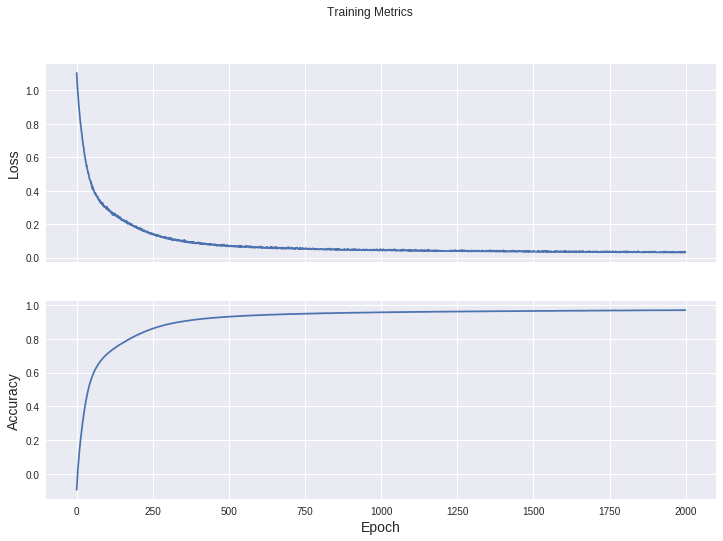

In [73]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(history_loss)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(history_acc)
plt.show()
